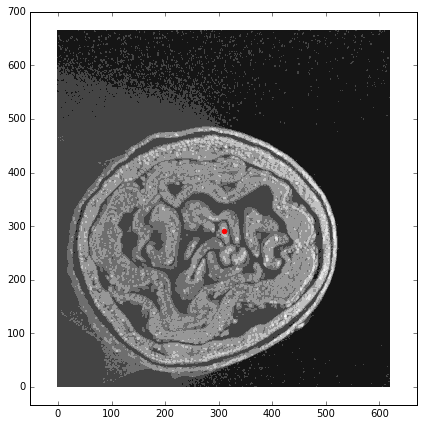

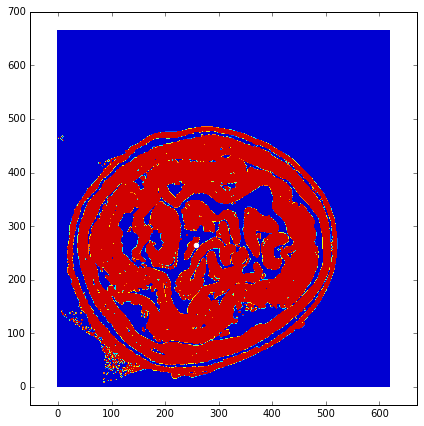

In [53]:
# calculate center of intensities
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
from scipy import ndimage
from skimage.measure import moments
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# open first image to get the image dimensions
im1 = np.array(Image.open('sargentii_17/batch3_tomo_areaij_sample17.0443.tif'),dtype=np.double)
im2 = np.array(Image.open('sargentii_17/batch3_tomo_areaij_sample17.0677.tif'),dtype=np.double)


clustered_img1 = KMeans(2).fit_predict(im1.reshape([np.prod(np.shape(im1)),1]))            
clustered_img1[clustered_img1 == clustered_img1[0]] = 2e0
clustered_img1[clustered_img1 != clustered_img1[0]] = 3e0
clustered_img1 = clustered_img1 - 2e0
clustered_img1 = clustered_img1.reshape(np.shape(im1))
clustered_img1 = np.array(clustered_img1,dtype=np.double)


clustered_img2 = KMeans(2).fit_predict(im2.reshape([np.prod(np.shape(im2)),1]))            
clustered_img2[clustered_img2 == clustered_img2[0]] = 2e0
clustered_img2[clustered_img2 != clustered_img2[0]] = 3e0
clustered_img2 = clustered_img2 - 2e0
clustered_img2 = clustered_img2.reshape(np.shape(im2))
clustered_img2 = np.array(clustered_img2,dtype=np.double)



m1 = moments(clustered_img1)
cr1 = m1[0, 1] / m1[0, 0]
cc1 = m1[1, 0] / m1[0, 0]

m2 = moments(clustered_img2)
cr2 = m2[0, 1] / m2[0, 0]
cc2 = m2[1, 0] / m2[0, 0]

m2 = moments(im2)
crI2 = m2[0, 1] / m2[0, 0]
ccI2 = m2[1, 0] / m2[0, 0]


plt.axis('equal')
plt.contourf(im2,cmap='Greys_r')
plt.scatter(crI2,ccI2,color='r')
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('imgs/centroid_intensity.png',dpi=150)
plt.show()

plt.axis('equal')
plt.contourf(clustered_img2)
plt.scatter(cr2,cc2,color='w')
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('imgs/centroid_clustered.png',dpi=150)
plt.show()



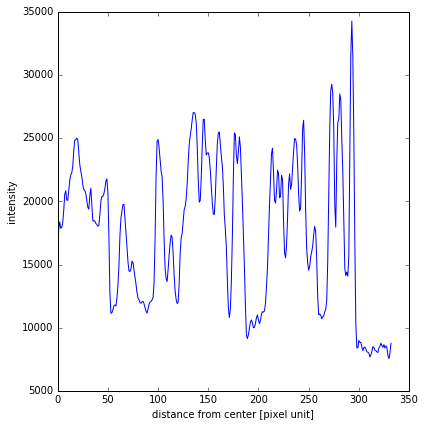

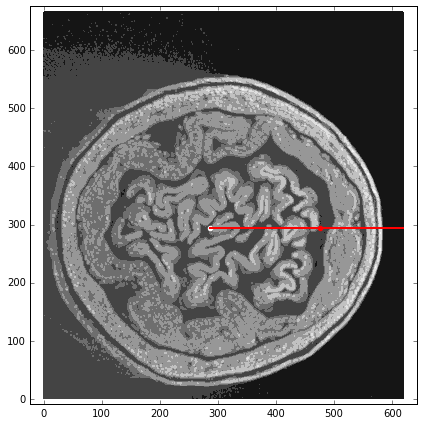

[ 9470.84131133] [ 9134.96069849] [ 0.0367687]
[ 8729.58426739] [ 9470.84131133] [-0.07826729]
[ 9115.97314463] [ 8729.58426739] [ 0.044262]
[ 9555.50420091] [ 9115.97314463] [ 0.04821548]
[ 9664.89813341] [ 9555.50420091] [ 0.01144826]
[ 9288.68129652] [ 9664.89813341] [-0.0389261]
[ 10113.55644424] [ 10322.29254416] [-0.02022187]
[ 10038.74071018] [ 10113.55644424] [-0.00739757]
[ 10330.31412687] [ 10038.74071018] [ 0.02904482]
[ 10387.94530041] [ 10330.31412687] [ 0.00557884]
[ 10281.20401104] [ 10387.94530041] [-0.0102755]
[ 10478.26826532] [ 10281.20401104] [ 0.01916743]
[ 10436.97878427] [ 10478.26826532] [-0.00394049]
[ 9582.20917842] [ 10436.97878427] [-0.08189818]
[ 9636.0860248] [ 9582.20917842] [ 0.00562259]
[ 9957.3571474] [ 9636.0860248] [ 0.03334042]
[ 10373.14607612] [ 9957.3571474] [ 0.04175696]
[ 10400.11312544] [ 10373.14607612] [ 0.0025997]
[ 10568.63005836] [ 10400.11312544] [ 0.01620337]
[ 11015.96521942] [ 10568.63005836] [ 0.04232669]
[ 11536.81112591] [ 11015.96

In [20]:
# calculate center of intensities
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import ndimage
from skimage.measure import moments
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
from scipy.interpolate import interp2d

# open first image to get the image dimensions
im1 = np.array(Image.open('sargentii_17/batch3_tomo_areaij_sample17.0503.tif'),dtype=np.double)


clustered_img1 = KMeans(2).fit_predict(im1.reshape([np.prod(np.shape(im1)),1]))            
clustered_img1[clustered_img1 == clustered_img1[0]] = 2e0
clustered_img1[clustered_img1 != clustered_img1[0]] = 3e0
clustered_img1 = clustered_img1 - 2e0
clustered_img1 = clustered_img1.reshape(np.shape(im1))
clustered_img1 = np.array(clustered_img1,dtype=np.double)

m1 = moments(clustered_img1)
cr1 = m1[0, 1] / m1[0, 0]
cc1 = m1[1, 0] / m1[0, 0]


# draw a radial line through this center and plot the intensity along the line
angles = np.linspace(0,359,num=360)

dx = np.cos(np.radians(angles[0]))
dy = np.sin(np.radians(angles[0]))

line_length = np.max(np.shape(im1))/2

line = np.zeros([2,line_length])

line[0,:] = cr1 + dx*np.arange(np.max(line_length))
line[1,:] = cc1 + dy*np.arange(np.max(line_length))

# function to interpolate the image
x = np.arange(0,np.shape(im1)[1]) 
y = np.arange(0,np.shape(im1)[0]) 
f = interp2d(x, y, im1, kind='cubic')
# the intensity along the line
intensity = np.array([f(line[0,i],line[1,i]) for i in range(line_length)])
intensity.shape = (line_length)


plt.xlabel('distance from center [pixel unit]')
plt.ylabel('intensity')
plt.plot(intensity)
plt.tight_layout()
plt.show()


# approximate the region where the leaf-shell boundary is
dist_range = [170,220]

# the derivative of the intensity 
#dint_dr = (intensity[dist_range[0]+1:dist_range[1]] - intensity[dist_range[0]:dist_range[1]-1])
# find the max derivative that is outward of the minimun intensity
#min_int_indx = np.argmin(intensity[dist_range[0]:dist_range[1]]) 
#max_der_indx = np.argmax(dint_dr[min_int_indx:])
#border = dist_range[0] + min_int_indx + max_der_indx

# the minimum intensity
border = np.argmin(intensity[dist_range[0]:dist_range[1]]) + dist_range[0]

plt.axis('equal')
plt.xlim([0,np.shape(im1)[1]])
plt.ylim([0,np.shape(im1)[0]])
plt.contourf(im1,cmap='Greys_r')
plt.plot(line[0,:],line[1,:],'r',linewidth=2)
plt.scatter(line[0,border],line[1,border],color='r')
plt.scatter(cr1,cc1,color='w')
plt.tight_layout()
plt.savefig('animation_border/img_'+str(0).zfill(4)+'.png',dpi=150)
plt.show()
plt.close()


# do this for each angle assuming that the border doesn't move more than 2 pixels
boundary = []

boundary.append([line[0,border],line[1,border]])

max_range = 30

diff = 0.05

for i in range(len(angles)-1):
    dx = np.cos(np.radians(angles[i+1]))
    dy = np.sin(np.radians(angles[i+1]))
    
    line = np.zeros([2,line_length])

    line[0,:] = cr1 + dx*np.arange(np.max(line_length))
    line[1,:] = cc1 + dy*np.arange(np.max(line_length))

    intensity = np.array([f(line[0,ii],line[1,ii]) for ii in range(line_length)])
    intensity.shape = (line_length)
    
    
    old_border_int = f(np.array(boundary)[-1,0],np.array(boundary)[-1,1])
    
    # check how far I need to go out to find a border with an intensity not too different from the old one
    j = 1
    while j*2 < max_range:
        indx_sorted = np.argsort(intensity[border-j*2:border+j*2])
        border_try = np.argmin(intensity[border-j*2:border+j*2]) + (border-j*2)
        border_try_int = f(line[0,border_try],line[1,border_try])
        
        if (border_try_int - old_border_int )/old_border_int < diff:
            j = max_range
            border = border_try
            
            print border_try_int,old_border_int,(border_try_int - old_border_int)/old_border_int

        else:
            j = j + 1
    
    #dint_dr = (intensity[border+1-max_range:border+max_range] - intensity[border-max_range:border+max_range-1])
    # find the max derivative that is outward of the minimun intensity
    #min_int_indx = np.argmin(intensity[border-max_range:border+max_range]) 
    #max_der_indx = np.argmax(dint_dr[min_int_indx:min_int_indx+max_int_range])
    
    #border = border - max_range + min_int_indx + max_der_indx
    #plt.plot(intensity[border-max_range:border+max_range])
    #plt.show()
    #stop
    

    
    # min intensity border
    #indx_sorted = np.argsort(intensity[border-max_range:border+max_range])
    #border = np.argmin(intensity[border-max_range:border+max_range]) + (border-max_range)
    
    boundary.append([line[0,border],line[1,border]])
    
    #print i,border
    
    plt.axis('equal')
    plt.contourf(im1,cmap='Greys_r')
    plt.plot(line[0,:],line[1,:],'r',linewidth=2)
    plt.xlim([0,np.shape(im1)[1]])
    plt.ylim([0,np.shape(im1)[0]])
    plt.plot(np.array(boundary)[:,0],np.array(boundary)[:,1],color='r',linewidth=3)    
    plt.scatter(line[0,border],line[1,border],color='r')
    plt.scatter(cr1,cc1,color='w')
    plt.tight_layout()
    plt.savefig('animation_border/img_'+str(i+1).zfill(4)+'.png',dpi=150)
    plt.close()
    
    #plt.xlabel('distance from center [pixel unit]')
    #plt.ylabel('intensity')
    #plt.plot(intensity)
    #plt.tight_layout()
    #plt.savefig('animation_border/intensity_'+str(i+1).zfill(4)+'.png',dpi=150)
    #plt.close()

    

